# **Problem Statement**

##**"TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website."**

## **Data Defination**

##***Attribute : Description (Data Type)***

***talk_id Talk*** : identification
number provided by
TED (int)

***title*** : Title of the talk (string)

***speaker_1*** : First speaker in TED's
speaker list (string)

***speakers*** : Speakers in the talk (dictionary)

***occupations*** : Occupations of the
speakers (dictionary)

***about_speakers*** : Blurb about each
speaker (dictionary)

***views(Dependent
Variable)*** : Count of views / (int)

***recorded_date*** : Date the talk was
recorded (string) 

***published_date*** : Date the talk was
published to TED.com (string)

***event*** : Event or medium in
which the talk was given (string)

***native_lang*** Language the talk was
given in (string)

***available_lang*** : All available languages
(lang_code) for a talk (list)

***comments*** : Count of comments (int)

***duration*** : Duration in seconds (int)

***topics*** : Related tags or topics for the talk (list)

***related_talks*** : Related talks
(key='talk_id',
value='title') (dictionary)

***url*** : URL of the talk (string)

***description*** : Description of the talk (string)

***transcript*** : Full transcript of the talk (string)

****The dictionary key maps to the speaker in ‘speakers’.***

##**Importing Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
sns.set() 
import ast

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data=pd.read_csv("/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/Copy of data_ted_talks.csv")

## ***Lets first describe our data.*** 

In [ ]:
raw_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### **Checking for null values**

In [ ]:
raw_data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

### **Checking for Duplicate values**

In [ ]:
# Duplicate values check
print(raw_data.duplicated().sum())

0


#**Now we can start our Exploratory Data Analysis**

In [ ]:
raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### **Formating DateTime**

In [ ]:
from datetime import datetime
import calendar
today=datetime.now()
today.strftime('%Y-%m-%d')

'2022-10-01'

**The format of recorded_date and published_date are in string format, we have to convert them into date format**

In [ ]:
# Recorded date formatting:
raw_data['recorded_date']= pd.to_datetime(raw_data['recorded_date'])
# Published date formatting:
raw_data['published_date']= pd.to_datetime(raw_data['published_date'])

In [ ]:
raw_data[['recorded_date','published_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recorded_date   4004 non-null   datetime64[ns]
 1   published_date  4005 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 62.7 KB


In [ ]:
# Number of days Ted talk has been published
last_publishing_date= raw_data['published_date'].max()
raw_data['time_passed_since_published']= last_publishing_date - pd.DatetimeIndex(raw_data['published_date'])

In [ ]:
import datetime
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
raw_data['publish_month'] = pd.DatetimeIndex(raw_data['published_date']).month
raw_data['publish_month'] = raw_data['publish_month'].apply(lambda x: calendar.month_abbr[x])
raw_data['publish_year'] = pd.DatetimeIndex(raw_data['published_date']).year
raw_data['publish_day'] = pd.DatetimeIndex(raw_data['published_date']).day
raw_data['publish_week_day']= raw_data['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])

###**Creating variable for Daily Views(Target)**

In [ ]:
# Daily views/Talk:
raw_data['daily_views'] = raw_data['views'] / ( raw_data['time_passed_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
raw_data[['publish_month','publish_year','publish_day','publish_week_day','daily_views']].head()

,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,Jun,2006,27,Tue,696.735614
1,Jun,2006,27,Tue,2867.645837
2,Jun,2006,27,Tue,379.836267
3,Jun,2006,27,Tue,526.808187
4,Jun,2006,27,Tue,12863.744117


### **Univariate analysis**

### **Continuous variables**

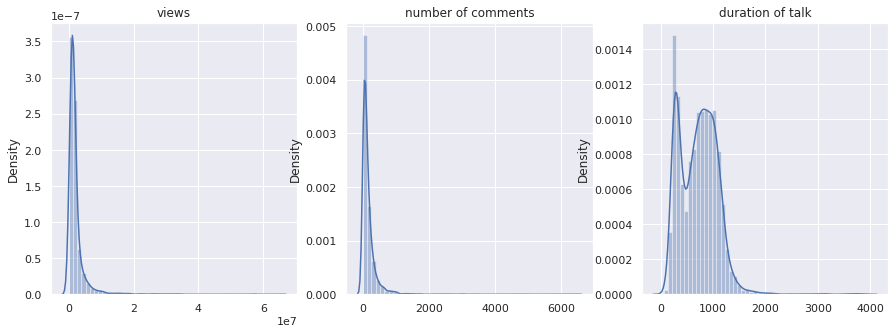

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= raw_data['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= raw_data['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= raw_data['duration'])

plt.show()

##***Bivariate analysis with dependent variable***

### **speaker_1 vs daily_views**



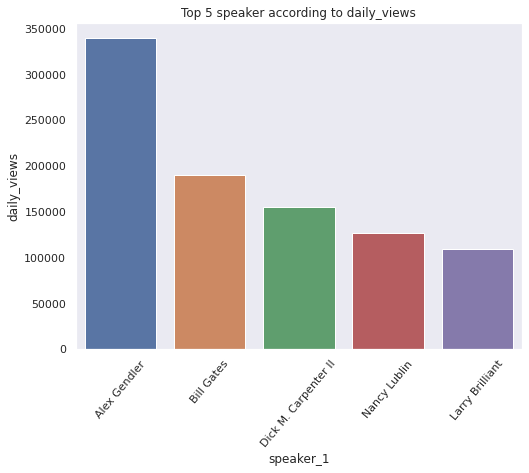

In [ ]:
#top 25 speakers
temp=raw_data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

### **Speaker Vs Number of talks delivered**

In [ ]:
data_speaker_count=pd.DataFrame(raw_data['speaker_1'].value_counts()).reset_index().rename(columns=({'index':'Speaker','speaker_1':'Number of talks'}))

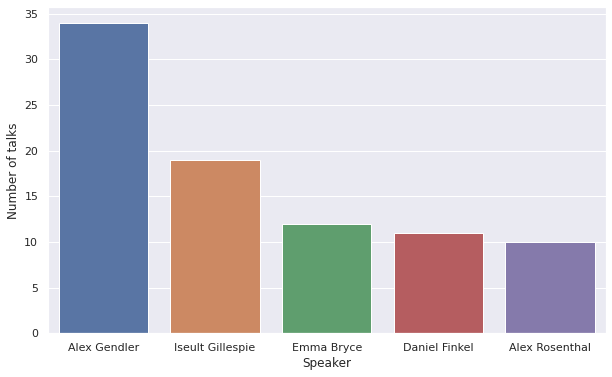

In [ ]:
most_talks = data_speaker_count.nlargest(5, 'Number of talks')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker', y = 'Number of talks', data = most_talks)
plt.show()

### **speaker vs duration**

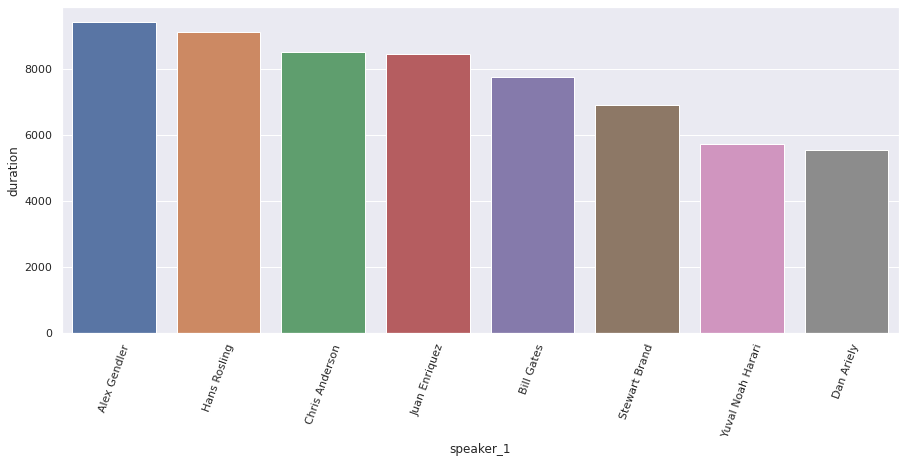

In [ ]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=raw_data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

### **Speaker vs comments**

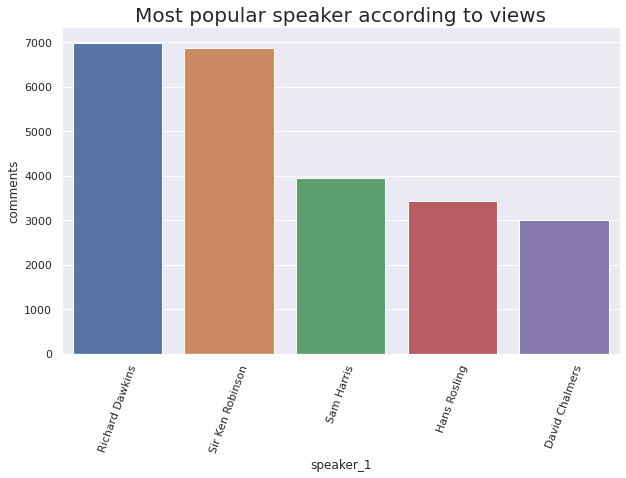

In [ ]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=70);
plt.title('Most popular speaker according to views',fontsize=20)
plt.show()

### **Speaker vs Average Views**

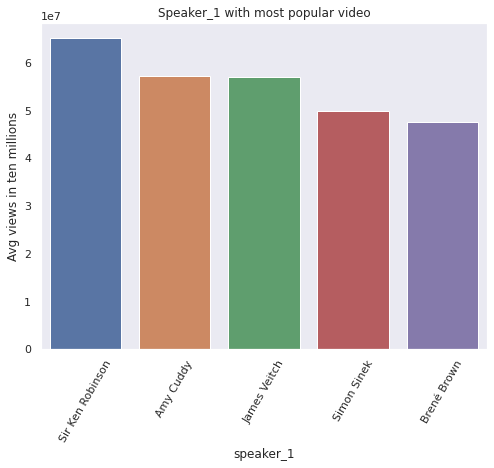

In [ ]:
# Speaker most popular video
temp=raw_data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

## **Target Encoding**

### ***Target encoding is the process of replacing a catgorical variable values with the mean of the target (dependent variable) variable***

### **Applying Target encoding on speaker_1**

In [ ]:
speaker=raw_data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
raw_data['speaker_1_avg_views']=raw_data['speaker_1'].map(speaker)

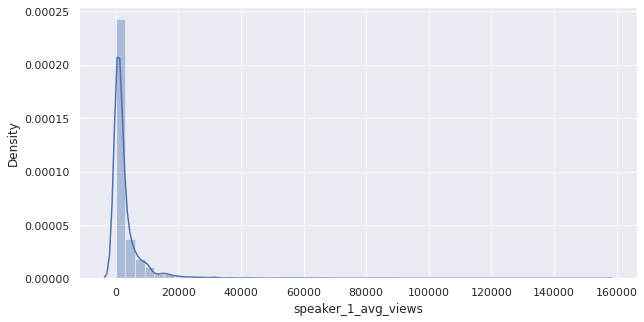

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['speaker_1_avg_views'])
plt.show()

### **Event**

### Event is also a catagorical variable, therefore we also apply target encoding on it. 

In [ ]:
event=raw_data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
raw_data['event_wise_avg_views']=raw_data['event'].map(event)

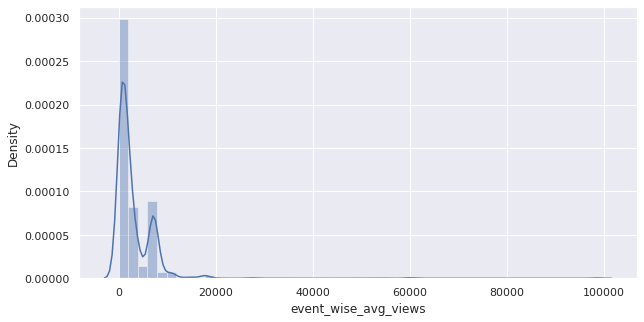

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['event_wise_avg_views'])
plt.show()

### **Top 10 Ted Talk events**

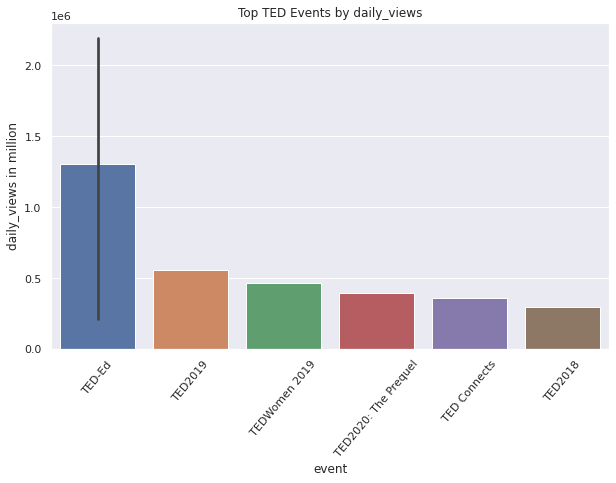

In [ ]:
temp=raw_data.groupby(['event','publish_year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

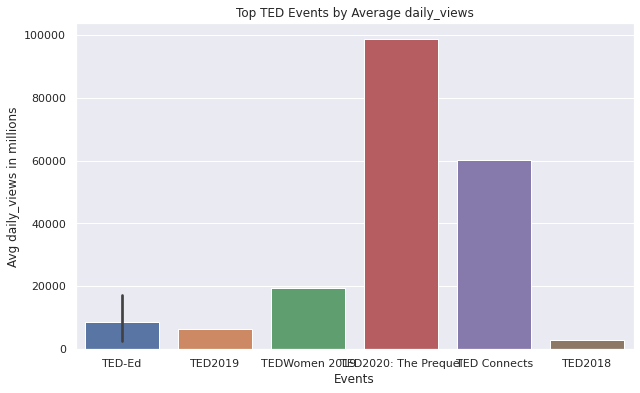

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')
plt.show()

###**available_language variable** 



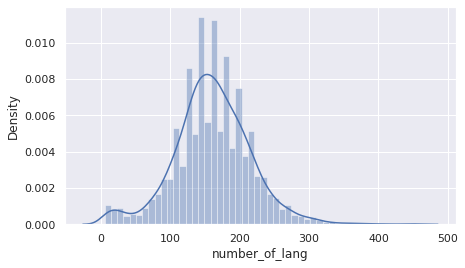

In [ ]:
raw_data['number_of_lang'] = raw_data['available_lang'].apply(lambda x: len(x))
sns.distplot(raw_data['number_of_lang'])
plt.show()

###**num_of_topic variable from topic variable**

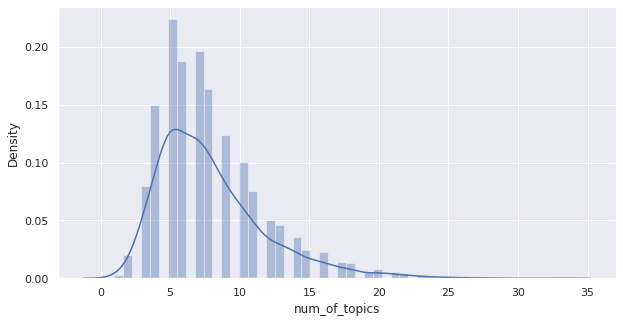

In [ ]:
raw_data['topics'] = raw_data.apply(lambda x: eval(x['topics']), axis=1)
raw_data['num_of_topics'] = raw_data.apply(lambda x: len(x['topics']), axis=1)
# graph:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['num_of_topics'])

### **Number of Unique Topics**

In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(raw_data)):
  temp=raw_data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

### **Target encoding on unique_topics**

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(raw_data)):
    temp2=raw_data['topics'][i]
    if(topic in temp2):
      temp+=raw_data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(raw_data)):
  temp=0
  temp_topic=raw_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
raw_data['topics_wise_avg_views'] = se.values

In [ ]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(raw_data['topics_wise_avg_views'])

## ***related_talks variable***

In [ ]:
raw_data['related_talks'] = raw_data['related_talks'].apply(lambda x: ast.literal_eval(x))

####**Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value. taking mean of all realated talk videos views**

In [ ]:
#defining a new feature called related_views
raw_data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in raw_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(raw_data)):
      if (raw_data.loc[i,'talk_id']) in id_list:
        temp+=raw_data.loc[i,'daily_views']

    raw_data.loc[index,'related_views']=temp//6

In [ ]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(raw_data['related_views'])
plt.show()

####**Converting time_passed_since_published into integer**

In [ ]:
raw_data['time_passed_since_published'] = raw_data['time_passed_since_published'].dt.days.astype('int16')

#**Feature Engineering and Data Preprocessing**

## **Verifying OLS assumptions**

### **Linearity**
Target and Predictors must have a linear relationships

In [ ]:
# checking for Linearity
      
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("comments")
sns.scatterplot(raw_data['comments'],raw_data['daily_views'])

plt.subplot(3,4,2)                   
plt.title("duration")
sns.scatterplot(raw_data['duration'],raw_data['daily_views'])

plt.subplot(3,4,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['daily_views'])

plt.subplot(3,4,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['daily_views'])

plt.subplot(3,4,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['daily_views'])

plt.subplot(3,4,6)
plt.title("speaker_1_avg_views")
sns.scatterplot(raw_data['speaker_1_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,7)
plt.title("event_wise_avg_views")
sns.scatterplot(raw_data['event_wise_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['daily_views'])

plt.subplot(3,4,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['daily_views'])

plt.subplot(3,4,10)
plt.title("topics_wise_avg_views")
sns.scatterplot(raw_data['topics_wise_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,11)
plt.title("related_views")
sns.scatterplot(raw_data['related_views'],raw_data['daily_views'])

plt.tight_layout()
plt.show()


### **Transformation for Linearity**


In [ ]:
# Transformation
raw_data['log_daily_views']=np.log(raw_data['daily_views'])
raw_data['log_comments']=np.log(raw_data['comments'])
raw_data['log_speaker_1_avg_views']=np.log(raw_data['speaker_1_avg_views'])
raw_data['log_event_wise_avg_views']=np.log(raw_data['event_wise_avg_views'])

In [ ]:
raw_data['log_duration']=np.log(raw_data['duration'])
raw_data['log_topics_wise_avg_views']=np.log(raw_data['topics_wise_avg_views'])
raw_data['log_related_views']=np.log(raw_data['related_views'])

In [ ]:
#  Linearity

fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("log_comments")
sns.scatterplot(raw_data['log_comments'],raw_data['log_daily_views'])

plt.subplot(3,4,2)
plt.title("log_duration")
sns.scatterplot(raw_data['log_duration'],raw_data['log_daily_views'])

plt.subplot(3,4,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['log_daily_views'])

plt.subplot(3,4,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['log_daily_views'])

plt.subplot(3,4,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['log_daily_views'])

plt.subplot(3,4,6)
plt.title("log_speaker_1_avg_views")
sns.scatterplot(raw_data['log_speaker_1_avg_views'],raw_data['log_daily_views'])

plt.subplot(3,4,7)
plt.title("log_event_wise_avg_views")
sns.scatterplot(raw_data['log_event_wise_avg_views'],raw_data['log_daily_views'])


plt.subplot(3,4,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['log_daily_views'])

plt.subplot(3,4,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['log_daily_views'])

plt.subplot(3,4,10)
plt.title("log_topics_wise_avg_views")
sns.scatterplot(raw_data['log_topics_wise_avg_views'],raw_data['log_daily_views'])

plt.subplot(3,4,11)
plt.title("log_related_views")
sns.scatterplot(raw_data['log_related_views'],raw_data['log_daily_views'])


plt.tight_layout()
plt.show()


**Not all features show linearity with the target and also many feature are showing hetroscedasticity**

###**Outliers Detection**

In [ ]:
# Boxplots
fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= raw_data['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= raw_data['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= raw_data['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= raw_data['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= raw_data['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= raw_data['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= raw_data['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= raw_data['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= raw_data['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= raw_data['log_daily_views'])

plt.subplot(3,4,11)
#plt.title("log_topics_wise_avg_views")
sns.boxplot(x= raw_data['log_topics_wise_avg_views'])

plt.subplot(3,4,12)
#plt.title("log_related_views")
sns.boxplot(x= raw_data['log_related_views'])

plt.tight_layout()
plt.show()

In [ ]:
# removing outliers from log_comments
q_low = raw_data['log_comments'].quantile(0.01)
q_hi  = raw_data['log_comments'].quantile(0.99)

df_1 = raw_data[(raw_data['log_comments'] < q_hi) & (raw_data['log_comments'] > q_low)]

In [ ]:
# removing outliers from log_duration
q_low = df_1["log_duration"].quantile(0.01)
q_hi  = df_1["log_duration"].quantile(0.99)

df_2 = df_1[(df_1["log_duration"] < q_hi) & (df_1["log_duration"] > q_low)]

In [ ]:
# removing outliers from log_speaker_1_avg_views
q_low = df_2["log_speaker_1_avg_views"].quantile(0.01)
q_hi  = df_2["log_speaker_1_avg_views"].quantile(0.99)

df_3 = df_2[(df_2["log_speaker_1_avg_views"] < q_hi) & (df_2["log_speaker_1_avg_views"] > q_low)]

In [ ]:
# removing outliers from log_event_wise_avg_views
q_low = df_3["log_event_wise_avg_views"].quantile(0.01)
q_hi  = df_3["log_event_wise_avg_views"].quantile(0.99)

df_4 = df_3[(df_3["log_event_wise_avg_views"] < q_hi) & (df_3["log_event_wise_avg_views"] > q_low)]

In [ ]:
# removing outliers from number_of_lang
q_low = df_4["number_of_lang"].quantile(0.01)
q_hi  = df_4["number_of_lang"].quantile(0.99)

df_5 = df_4[(df_4["number_of_lang"] < q_hi) & (df_4["number_of_lang"] > q_low)]

In [ ]:
# removing outliers from num_of_topics
q_hi  = df_5["num_of_topics"].quantile(0.99)

df_6 = df_5[df_5["num_of_topics"] < q_hi]

In [ ]:
# removing outliers from log_daily_views
q_low = df_6["log_daily_views"].quantile(0.01)
q_hi  = df_6["log_daily_views"].quantile(0.99)

df_7 = df_6[(df_6["log_daily_views"] < q_hi) & (df_6["log_daily_views"] > q_low)]

In [ ]:
# removing outliers from log_topics_wise_avg_views
q_low = df_7["log_topics_wise_avg_views"].quantile(0.01)
q_hi  = df_7["log_topics_wise_avg_views"].quantile(0.99)

df_8 = df_7[(df_7["log_topics_wise_avg_views"] < q_hi) & (df_7["log_topics_wise_avg_views"] > q_low)]

In [ ]:
# removing outliers from log_related_views
q_low = df_8["log_related_views"].quantile(0.01)
q_hi  = df_8["log_related_views"].quantile(0.99)

df_filtered = df_8[(df_8["log_related_views"] < q_hi) & (df_8["log_related_views"] > q_low)]

In [ ]:
# New Boxplots
fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= df_filtered['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= df_filtered['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= df_filtered['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= df_filtered['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= df_filtered['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= df_filtered['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= df_filtered['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= df_filtered['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= df_filtered['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= df_filtered['log_daily_views'])

plt.subplot(3,4,11)
#plt.title("log_topics_wise_avg_views")
sns.boxplot(x= df_filtered['log_topics_wise_avg_views'])

plt.subplot(3,4,12)
#plt.title("log_related_views")
sns.boxplot(x= df_filtered['log_related_views'])

plt.tight_layout()
plt.show()

**Removing irrelevent features**

In [ ]:
df_filtered.columns

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'comments', 'duration', 'daily_views','speaker_1_avg_views',
       'event_wise_avg_views','topics_wise_avg_views','related_views']

In [ ]:
df_filtered.drop(columns=unwanted_features,inplace=True)

### **Removing collinearity**

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(df_filtered.corr()), annot= True, cmap= 'GnBu_r',ax=ax)
plt.show()

### **Variance inflation factor analysis**

In [ ]:
vif_data=df_filtered.drop(['publish_week_day','publish_month','log_daily_views','publish_year','number_of_lang','log_comments','log_related_views','log_topics_wise_avg_views','log_duration','log_event_wise_avg_views'],axis=1)

In [ ]:
vif_df=pd.DataFrame()
vif_df['features']=vif_data.columns
vif_df['VIF']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif_df

**We have taken the VIF limit 10**

### **Lets check for normal distribution of features in data**

In [ ]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.title("time_passed_since_published")
sns.distplot(x= df_filtered['time_passed_since_published'])

plt.subplot(2,3,2)
plt.title("publish_day")
sns.distplot(x= df_filtered['publish_day'])

plt.subplot(2,3,3)
plt.title("num_of_topics")
sns.distplot(x= df_filtered['num_of_topics'])

plt.subplot(2,3,4)
plt.title("log_speaker_1_avg_views")
sns.distplot(x= df_filtered['log_speaker_1_avg_views'])

#plt.subplot(2,3,5)
#plt.title("log_daily_views")
#sns.histplot(x= np.log(df_filtered['related_views']))


plt.subplot(2,3,5)
plt.title("log_daily_views")
sns.distplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

### **Transformation**

In [ ]:
# Transformation
df_filtered['sqrt_publish_day']=np.sqrt(df_filtered['publish_day'])
df_filtered['log_num_of_topics']=np.log(df_filtered['num_of_topics'])
df_filtered['log_time_passed_since_published']=np.log(df_filtered['time_passed_since_published'])

In [ ]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.title("log_time_passed_since_published")
sns.distplot(x= df_filtered['log_time_passed_since_published'])

plt.subplot(2,3,2)
plt.title("sqrt_publish_day")
sns.distplot(x= df_filtered['sqrt_publish_day'])

plt.subplot(2,3,3)
plt.title("log_num_of_topics")
sns.distplot(x= df_filtered['log_num_of_topics'])

plt.subplot(2,3,4)
plt.title("log_speaker_1_avg_views")
sns.distplot(x= df_filtered['log_speaker_1_avg_views'])

#plt.subplot(2,3,5)
#plt.title("log_daily_views")
#sns.histplot(x= np.log(df_filtered['related_views']))


plt.subplot(2,3,5)
plt.title("log_daily_views")
sns.distplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

In [ ]:
df_filtered.columns

In [ ]:
data=df_filtered.drop(['log_topics_wise_avg_views','time_passed_since_published','publish_year','log_duration','log_comments','log_event_wise_avg_views','number_of_lang','publish_day','num_of_topics','log_related_views'],axis=1)

In [ ]:
data.columns

#**Lets start the model preparation.** 

In [ ]:
data['log_daily_views'].describe()

###**Removing null values from dataset**

In [ ]:
data=data.dropna()

### **Introducing dummy variables for Catagorical features**

In [ ]:
data_dummy=pd.get_dummies(data,drop_first=True)
data_dummy.shape

## **Defining dependent and independent features**

In [ ]:
y=data_dummy['log_daily_views']
X=data_dummy.drop(columns='log_daily_views')

In [ ]:
X.head()

### **Next we will standardize the features**

In [ ]:
scaler=StandardScaler()
scaler.fit(X)
x=scaler.transform(X)

###**Lets split the data into training and testing** 

In [ ]:
# Spliting dataset into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Implementing Linear Regression Training Model**

In [ ]:
# Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

### **Model Accuracy on train data**

In [ ]:
yhat=reg.predict(x_train)

In [ ]:
plt.scatter(y_train,yhat)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

### **Scatter plot must be as close to the 45 degree line from origin as possible for best predictions**

In [ ]:
# Other way to judge the model
sns.distplot(y_train-yhat)
plt.title('Residual PDF',fontsize=15)
plt.show()

### **Model Evaluation metrics**

In [ ]:
# R-square to explain the variability our model id able to explain
R2=reg.score(x_train,y_train)
R2


In [ ]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

In [ ]:
variability_df=pd.DataFrame({"R-Square":R2,"Adjusted R-Square":adj_r_sqr},index=["Values"])
variability_df

## **Lets see the model Parameters**

### **Intercept**

In [ ]:
reg.intercept_

### **Rest of the parameters**

In [ ]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary

#***Wieghts Interpretation***
##***Continuous Variable***
### 1. A ***positive wieght*** shows that as the feature increases in values so does the daily_views and log_daily_views variables.
### 2. A ***negative wieght*** shows that as the feature increases in values the daily_views and log_daily_views variables decreses in values.

##***Dummy Variables***
### 1. A ***positive wieght*** shows that the respective catagory is more expensive than the benchmark
### 2. A ***positive wieght*** shows that the respective catagory is less expensive than the benchmark

#**Testing**

In [ ]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.exp(yhat_test))
plt.plot(np.array(np.exp(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
pf_df=pd.DataFrame({'Predictions':np.exp(yhat_test)})
pf_df.head()

In [ ]:
y_test=y_test.reset_index(drop=True)
pf_df['Target(expected values)']=np.exp(y_test)

In [ ]:
pf_df.head()

In [ ]:
pf_df['Residual']=pf_df['Target(expected values)']-pf_df['Predictions']
pf_df['Difference_percentage']=np.absolute(pf_df['Residual']/pf_df['Target(expected values)']*100)
pf_df.describe()

###**Error percentage is very less between 25 quartile to 75 quartile that shows our model is working very good on test data.**

## **Error metrices**

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(yhat_test))

In [ ]:
RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(yhat_test)))

In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(yhat_test[ele]))
  
MAE = sum/n
  
# display
print("Mean absolute error : " + str(MAE))

In [ ]:
MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(yhat_test))

In [ ]:
r2 = r2_score(np.exp(y_test), np.exp(yhat_test))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(yhat_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
error_metric=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric

###**Error metrices show the same observation of low error in the test dataset**

#**Lets check for overfitting in our model** 

## <b>Lasso Regression Model</b>
####  **Running Grid Search Cross Validation**

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_lasso))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_lasso,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso))

In [ ]:
RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso)))

In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_lasso[ele]))
  
MAE = sum/n
  
# display
print("Mean absolute error : " + str(MAE))

In [ ]:
MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_lasso))

In [ ]:
r2 = r2_score(np.exp(y_test), np.exp(y_pred_lasso))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
error_metric_lasso=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_lasso

## <b>Ridge Regression Model</b>
####  **Running Grid Search Cross Validation**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_ridge))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_ridge,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge))

In [ ]:
RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge)))

In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_ridge[ele]))
  
MAE = sum/n
  
# display
print("Mean absolute error : " + str(MAE))

In [ ]:
MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_ridge))

In [ ]:
r2 = r2_score(np.exp(y_test), np.exp(y_pred_ridge))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
error_metric_ridge=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_ridge

## <b>Elastic Regression Model</b>
####  **Running Grid Search Cross Validation**

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_elastic))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_elastic,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic))

In [ ]:
RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic)))

In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_elastic[ele]))
  
MAE = sum/n
  
# display
print("Mean absolute error : " + str(MAE))

In [ ]:
MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_elastic))

In [ ]:
r2 = r2_score(np.exp(y_test), np.exp(y_pred_elastic))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
error_metric_Elastic=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_ridge

In [ ]:
Model_Summary=pd.DataFrame({'Linear Regression':error_metric['Values'],'Lasso':error_metric_lasso['Values'],'Ridge':error_metric_ridge['Values'],'Elastic':error_metric_Elastic['Values']},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])

In [ ]:
Model_Summary

##**On comparing all the models our base linear regression model is still is performing better followed by Lasso, Ridge and ElasticNet Regression model on the basis of RMSE. But our model contains large number of outliers and the value of RMSE is affected by outliers therefore we will use MAE as our evaluation matrix according to which *Lasso Regressor* has the best performance**

# **Conclusion**

**That's it we have reached the end of this project. We started the project with Data Exploration in which we faced many challenges as dataset included data in many different data structures which was bit complicated to extract but the most challenging part of EDA was dealing catagorical variables, it took lot of research to deal with such large number of catagorical variables. Following EDA we performed feature engineering, data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.**

**Then we checked our model for overfitting by comparing it with Lasso Regression model, Ridge Regression model, ElasticNet Regression model.**

**We found that our orignal base model was overfit and Lasso Regressor has the best accuracy.**

**In all of these models our mean errors have been around 34 % but we will consider the median error percentage, which is 13 %, to measure the accuracy because of the outliers. That implies we have been able to correctly predict views 87 % of the time.**

**After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing.**

**Given that only have 13 % errors, our models have performed very well on unseen data due to various factors like effecive EDA,feature selection,correct model selection.**

**In all the features speaker_1_avg_views is most important this implies that speakers are directly impacting the views.**

**Future Work**

*   **Training our data on other models (XGB, Random Forest, etc)**
*   **More efficiant Hyperparameter Tuning through techniques like Random Search**


